TASK-1

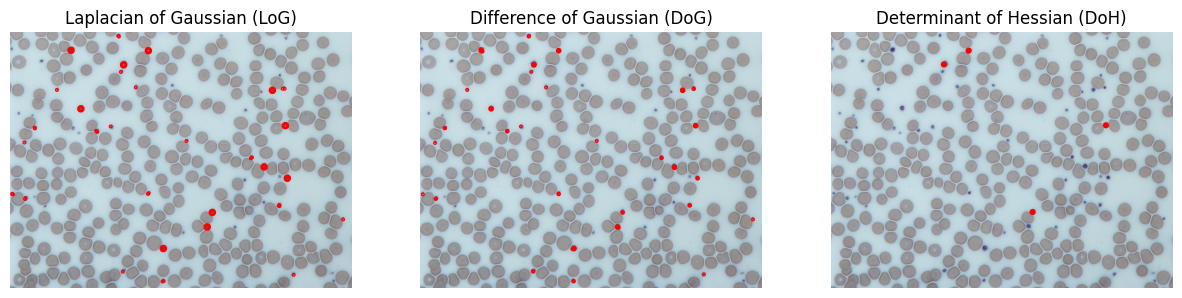

Number of blobs detected using LoG: 42
Number of blobs detected using DoG: 34
Number of blobs detected using DoH: 4


In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from skimage.feature import blob_dog, blob_log, blob_doh
from skimage.color import rgb2gray
from skimage import img_as_float

image = cv2.imread('/content/cells.jpg')
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Convert to HSV to extract purple regions
hsv_image = cv2.cvtColor(image, cv2.COLOR_RGB2HSV)
lower_purple = np.array([120, 50, 50])
upper_purple = np.array([160, 255, 255])
mask = cv2.inRange(hsv_image, lower_purple, upper_purple)

# Extract only the purple regions
purple_regions = cv2.bitwise_and(image, image, mask=mask)
purple_gray = rgb2gray(purple_regions)

# 1️⃣ Apply Laplacian of Gaussian (LoG)
blobs_log = blob_log(purple_gray, max_sigma=30, num_sigma=10, threshold=0.1)
blobs_log[:, 2] = blobs_log[:, 2] * np.sqrt(2)

# 2️⃣ Apply Difference of Gaussian (DoG)
blobs_dog = blob_dog(purple_gray, max_sigma=30, threshold=0.1)
blobs_dog[:, 2] = blobs_dog[:, 2] * np.sqrt(2)

blobs_doh = blob_doh(purple_gray, max_sigma=30, threshold=0.01)

fig, axes = plt.subplots(1, 3, figsize=(15, 5))
titles = ['Laplacian of Gaussian (LoG)', 'Difference of Gaussian (DoG)', 'Determinant of Hessian (DoH)']
blobs = [blobs_log, blobs_dog, blobs_doh]

for ax, title, blobs_detected in zip(axes, titles, blobs):
    ax.imshow(image)
    ax.set_title(title)
    ax.axis("off")

    for blob in blobs_detected:
        y, x, r = blob
        c = plt.Circle((x, y), r, color='red', linewidth=2, fill=False)
        ax.add_patch(c)

plt.show()

# Print Number of Detected Blobs
print(f"Number of blobs detected using LoG: {len(blobs_log)}")
print(f"Number of blobs detected using DoG: {len(blobs_dog)}")
print(f"Number of blobs detected using DoH: {len(blobs_doh)}")

Applying LoG on Image 1


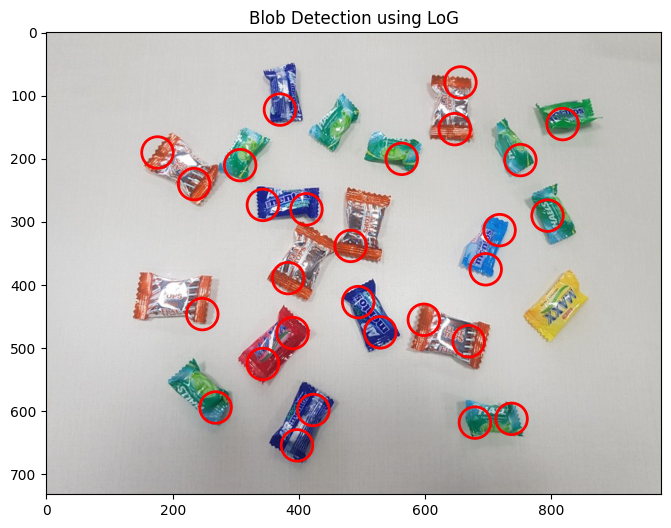

Number of blobs detected in Image 1: 28
Applying DoG on Image 1


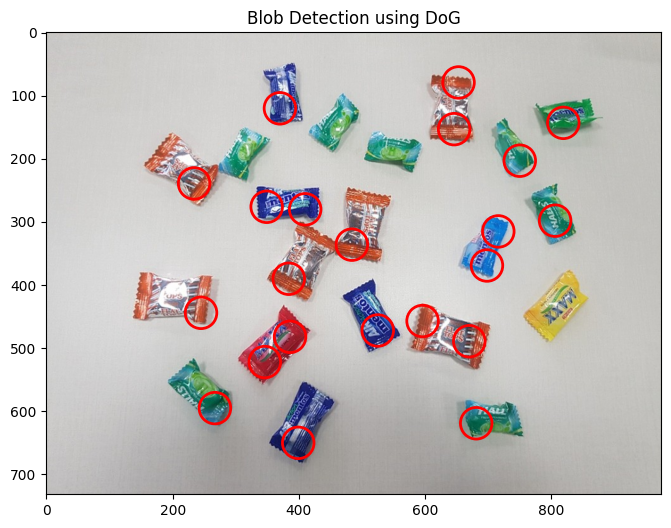

Number of blobs detected in Image 1: 22
Applying DoH on Image 1


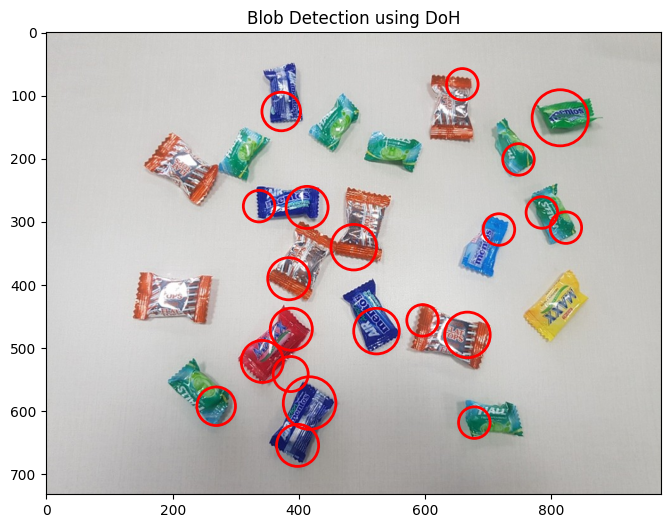

Number of blobs detected in Image 1: 21


In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from skimage.feature import blob_dog, blob_log, blob_doh
from skimage.color import rgb2gray
from skimage.morphology import erosion, dilation, opening, closing, area_opening, area_closing
from skimage.io import imread

def preprocess_image(image):
    # Check if the image has an alpha channel (4 channels)
    if image.shape[2] == 4:
        # Convert RGBA to RGB by dropping the alpha channel
        image = image[:, :, :3]

    if image.ndim == 3:
        gray = rgb2gray(image)
    else:
        gray = image

    binary = gray < 0.45

    struct_elem = np.array([[0,1,0],
                             [1,1,1],
                             [0,1,0]])

    def multi_erosion(image, num):
        for _ in range(num):
            image = erosion(image, struct_elem)
        return image

    def multi_dilation(image, num):
        for _ in range(num):
            image = dilation(image, struct_elem)
        return image

    eroded = multi_erosion(binary, 2)
    opened = opening(eroded)
    dilated = multi_dilation(opened, 2)
    morphed = area_opening(area_closing(dilated, 10), 10)
    return morphed


def detect_blobs(image, method="LoG"):
    preprocessed = preprocess_image(image)

    if method == "LoG":
        blobs = blob_log(preprocessed, min_sigma=25, max_sigma=50, num_sigma=10, threshold=0.05)
    elif method == "DoG":
        blobs = blob_dog(preprocessed, min_sigma=25, max_sigma=50, sigma_ratio=1.6, threshold=0.05)
    elif method == "DoH":
        blobs = blob_doh(preprocessed, min_sigma=25, max_sigma=50, threshold=0.01)
    else:
        raise ValueError("Invalid method. Choose 'LoG', 'DoG', or 'HoG'")

    return blobs

def plot_blobs(image, blobs, method):
    fig, ax = plt.subplots(figsize=(10, 6))
    ax.imshow(image, cmap='gray')
    for blob in blobs:
        y, x, r = blob
        circle = plt.Circle((x, y), r, color='red', linewidth=2, fill=False)
        ax.add_patch(circle)
    plt.title(f"Blob Detection using {method}")
    plt.show()

# Load images
image1 = imread("/content/candy.jpg")

# Apply different blob detection techniques
methods = ["LoG", "DoG", "DoH"]
for method in methods:
    print(f"Applying {method} on Image 1")
    blobs1 = detect_blobs(image1, method)
    plot_blobs(image1, blobs1, method)
    print(f"Number of blobs detected in Image 1: {len(blobs1)}")

Applying LoG on Image 3


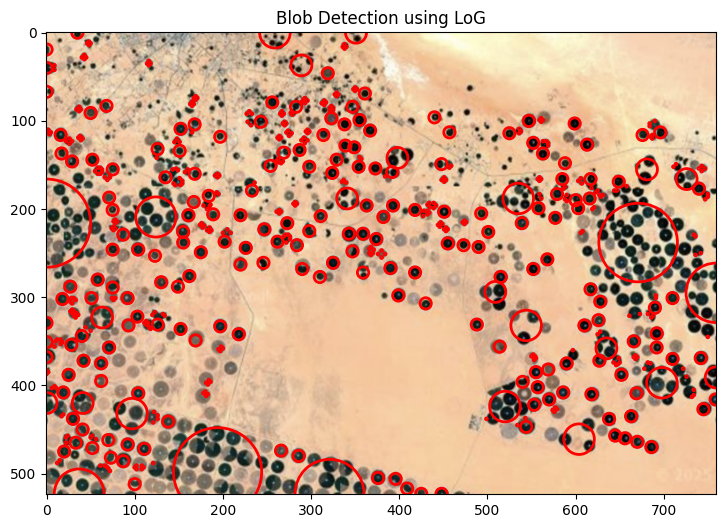

Number of blobs detected in Image 3: 610
Applying LoG on Image 4


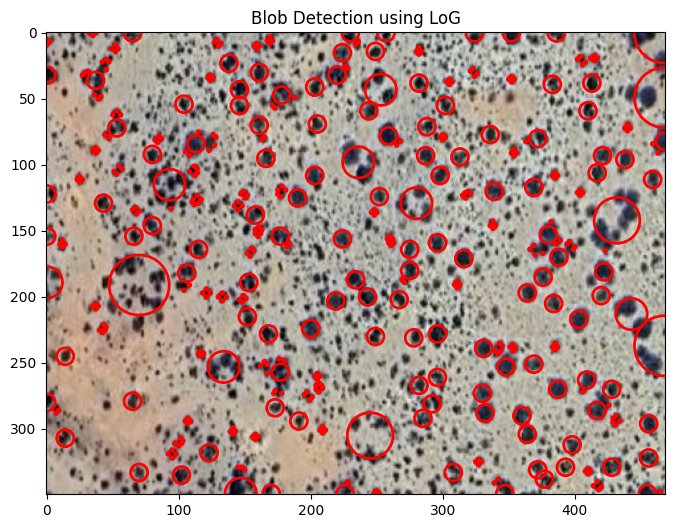

Number of blobs detected in Image 4: 454
Applying DoG on Image 3


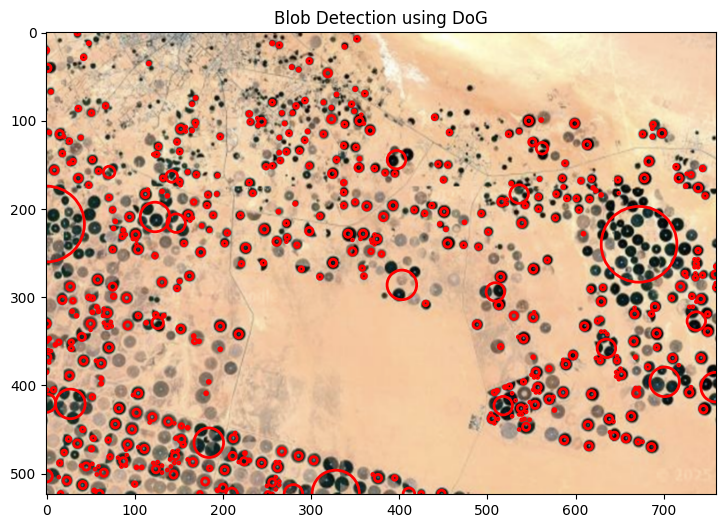

Number of blobs detected in Image 3: 547
Applying DoG on Image 4


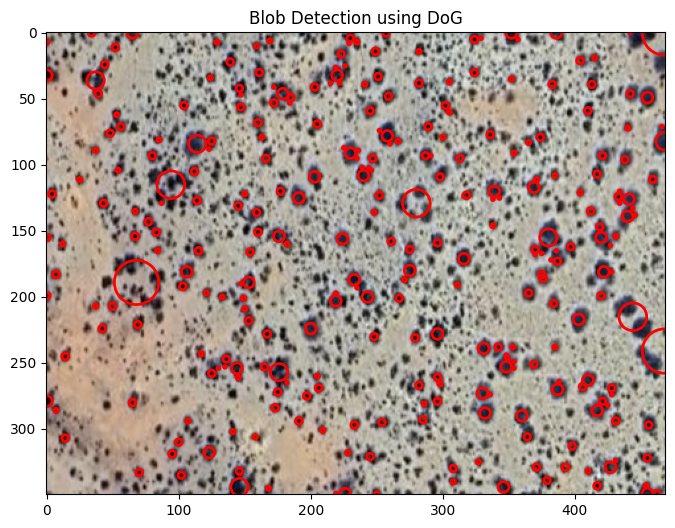

Number of blobs detected in Image 4: 294
Applying HoG on Image 3


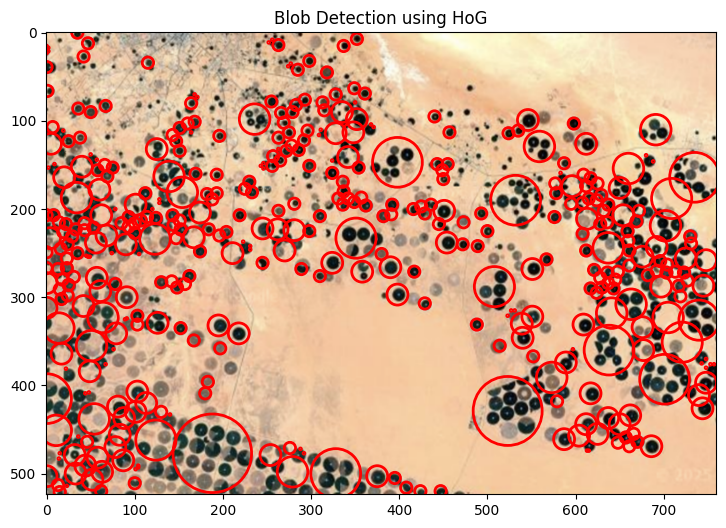

Number of blobs detected in Image 3: 420
Applying HoG on Image 4


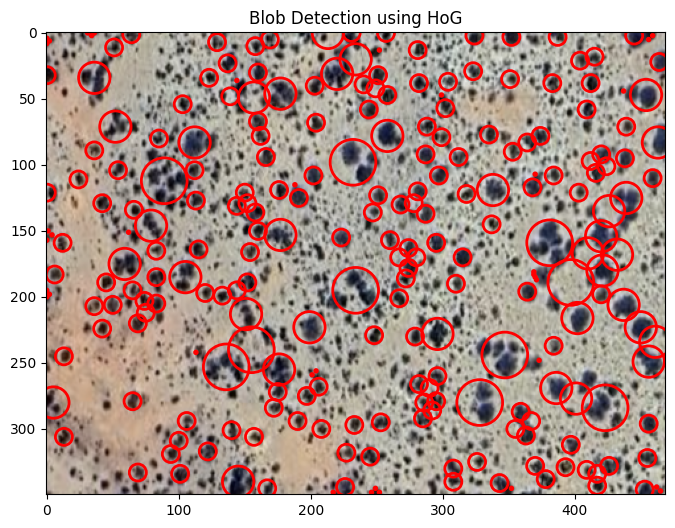

Number of blobs detected in Image 4: 248


In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from skimage.feature import blob_dog, blob_log, blob_doh
from skimage.color import rgb2gray
from skimage.morphology import erosion, dilation, opening, closing, area_opening, area_closing
from skimage.io import imread

def preprocess_image(image):
    # Check if the image has an alpha channel (4 channels)
    if image.shape[2] == 4:
        # Convert RGBA to RGB by dropping the alpha channel
        image = image[:, :, :3]

    if image.ndim == 3:
        gray = rgb2gray(image)
    else:
        gray = image

    binary = gray < 0.45

    struct_elem = np.array([[0,1,0],
                             [1,1,1],
                             [0,1,0]])

    def multi_erosion(image, num):
        for _ in range(num):
            image = erosion(image, struct_elem)
        return image

    def multi_dilation(image, num):
        for _ in range(num):
            image = dilation(image, struct_elem)
        return image

    eroded = multi_erosion(binary, 2)
    opened = opening(eroded)
    dilated = multi_dilation(opened, 2)
    morphed = area_opening(area_closing(dilated, 10), 10)
    return morphed


def detect_blobs(image, method="LoG"):
    preprocessed = preprocess_image(image)

    if method == "LoG":
        blobs = blob_log(preprocessed, min_sigma=1, max_sigma=50, num_sigma=10, threshold=0.05)
    elif method == "DoG":
        blobs = blob_dog(preprocessed, min_sigma=1, max_sigma=50, sigma_ratio=1.6, threshold=0.05)
    elif method == "HoG":
        blobs = blob_doh(preprocessed, min_sigma=1, max_sigma=50, threshold=0.01)
    else:
        raise ValueError("Invalid method. Choose 'LoG', 'DoG', or 'HoG'")

    return blobs

def plot_blobs(image, blobs, method):
    fig, ax = plt.subplots(figsize=(10, 6))
    ax.imshow(image, cmap='gray')
    for blob in blobs:
        y, x, r = blob
        circle = plt.Circle((x, y), r, color='red', linewidth=2, fill=False)
        ax.add_patch(circle)
    plt.title(f"Blob Detection using {method}")
    plt.show()

# Load images
image3 = imread("/content/satalite.png")
image4 = imread("/content/Picture2.png")

# Apply different blob detection techniques
methods = ["LoG", "DoG", "HoG"]
for method in methods:
    print(f"Applying {method} on Image 3")
    blobs3 = detect_blobs(image3, method)
    plot_blobs(image3, blobs3, method)
    print(f"Number of blobs detected in Image 3: {len(blobs3)}")

    print(f"Applying {method} on Image 4")
    blobs4 = detect_blobs(image4, method)
    plot_blobs(image4, blobs4, method)
    print(f"Number of blobs detected in Image 4: {len(blobs4)}")

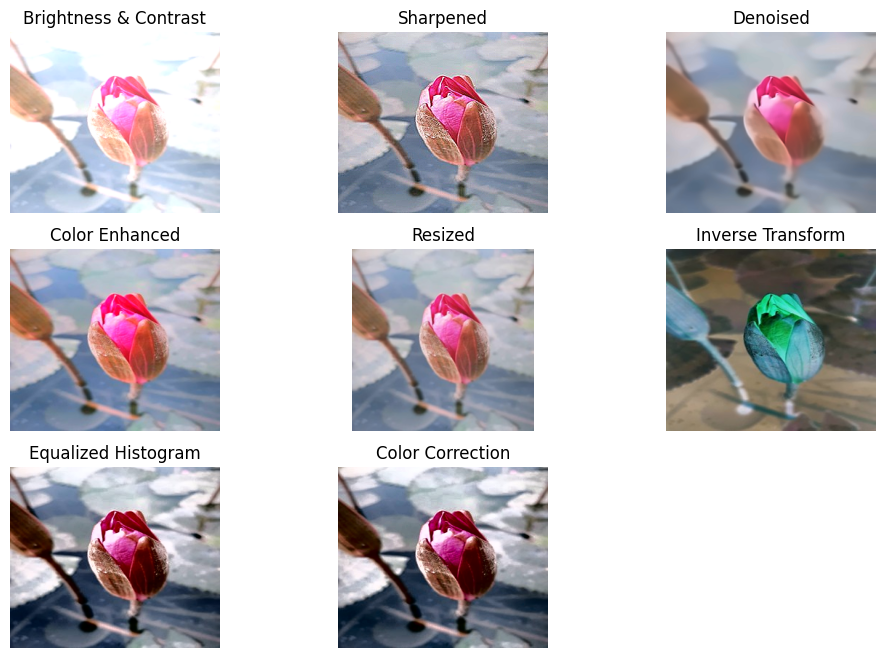

In [ ]:
import cv2
import numpy as np
from skimage import restoration
from PIL import Image, ImageEnhance
import matplotlib.pyplot as plt
from cv2 import dnn_superres

def adjust_brightness_contrast(image, alpha=1.2, beta=50):
    return cv2.convertScaleAbs(image, alpha=alpha, beta=beta)

def sharpen_image(image):
    kernel = np.array([[0, -1, 0], [-1, 5, -1], [0, -1, 0]])
    return cv2.filter2D(image, -1, kernel)

def remove_noise(image):
    return cv2.fastNlMeansDenoisingColored(image, None, 10, 10, 7, 21)

def enhance_color(image):
    pil_img = Image.fromarray(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    enhancer = ImageEnhance.Color(pil_img)
    enhanced_image = enhancer.enhance(1.5)
    return cv2.cvtColor(np.array(enhanced_image), cv2.COLOR_RGB2BGR)

def resize_image(image, width, height):
    return cv2.resize(image, (width, height), interpolation=cv2.INTER_AREA)

def inverse_transform(image):
    return cv2.bitwise_not(image)

def equalize_histogram(image):
    if len(image.shape) == 2:
        return cv2.equalizeHist(image)
    ycrcb = cv2.cvtColor(image, cv2.COLOR_BGR2YCrCb)
    ycrcb[:, :, 0] = cv2.equalizeHist(ycrcb[:, :, 0])
    return cv2.cvtColor(ycrcb, cv2.COLOR_YCrCb2BGR)

def color_correction(image):
    lab = cv2.cvtColor(image, cv2.COLOR_BGR2LAB)
    l, a, b = cv2.split(lab)
    l = cv2.equalizeHist(l)
    lab = cv2.merge((l, a, b))
    return cv2.cvtColor(lab, cv2.COLOR_LAB2BGR)

def process_image(image_path):
    image = cv2.imread(image_path)
    processed_images = {
        "Brightness & Contrast": adjust_brightness_contrast(image),
        "Sharpened": sharpen_image(image),
        "Denoised": remove_noise(image),
        "Color Enhanced": enhance_color(image),
        "Resized": resize_image(image, 300, 300),
        "Inverse Transform": inverse_transform(image),
        "Equalized Histogram": equalize_histogram(image),
        "Color Correction": color_correction(image),
    }

    plt.figure(figsize=(12, 8))
    for i, (title, img) in enumerate(processed_images.items()):
        plt.subplot(3, 3, i+1)
        plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
        plt.title(title)
        plt.axis("off")
    plt.show()

# Example usage
process_image("/content/tulip.jpg")  # Replace 'input.jpg' with your image file


TASK-2

In [ ]:
!pip install tensorflow keras deeplake

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 19.4/19.4 MB 83.0 MB/s eta 0:00:00


In [ ]:
import tensorflow as tf
from tensorflow.keras import datasets

(x_train, y_train), (x_test, y_test) = datasets.cifar100.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0  # Normalization

169001437/169001437 ━━━━━━━━━━━━━━━━━━━━ 8s 0us/step


In [ ]:
from tensorflow.keras.applications import VGG16
from tensorflow.keras.applications import ResNet50  # As AlexNet is unavailable in Keras
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, Flatten

# VGG16 Model
vgg_model = VGG16(weights='imagenet', include_top=False, input_shape=(32, 32, 3))

58889256/58889256 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step


In [ ]:
vgg16 = tf.keras.Sequential([
    vgg_model,
    Flatten(),
    Dense(256, activation='relu'),
    Dense(100, activation='softmax')
])

vgg16.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [ ]:
resnet_model = ResNet50(weights='imagenet', include_top=False, input_shape=(32, 32, 3))

alexnet = tf.keras.Sequential([
    resnet_model,
    Flatten(),
    Dense(256, activation='relu'),
    Dense(100, activation='softmax')
])

alexnet.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

94765736/94765736 ━━━━━━━━━━━━━━━━━━━━ 3s 0us/step


In [ ]:
vgg16.fit(x_train, y_train, epochs=5, batch_size=64, validation_data=(x_test, y_test))
alexnet.fit(x_train, y_train, epochs=5, batch_size=64, validation_data=(x_test, y_test))

Epoch 1/5
782/782 ━━━━━━━━━━━━━━━━━━━━ 62s 62ms/step - accuracy: 0.0237 - loss: 4.4158 - val_accuracy: 0.0522 - val_loss: 4.0643
Epoch 2/5
782/782 ━━━━━━━━━━━━━━━━━━━━ 66s 53ms/step - accuracy: 0.0568 - loss: 3.9978 - val_accuracy: 0.0887 - val_loss: 3.7780
Epoch 3/5
782/782 ━━━━━━━━━━━━━━━━━━━━ 82s 54ms/step - accuracy: 0.1030 - loss: 3.6422 - val_accuracy: 0.1593 - val_loss: 3.3308
Epoch 4/5
782/782 ━━━━━━━━━━━━━━━━━━━━ 82s 54ms/step - accuracy: 0.1749 - loss: 3.2244 - val_accuracy: 0.1926 - val_loss: 3.2259
Epoch 5/5
782/782 ━━━━━━━━━━━━━━━━━━━━ 82s 53ms/step - accuracy: 0.2367 - loss: 2.9422 - val_accuracy: 0.2416 - val_loss: 2.9630
Epoch 1/5
782/782 ━━━━━━━━━━━━━━━━━━━━ 114s 72ms/step - accuracy: 0.1433 - loss: 3.8191 - val_accuracy: 0.0262 - val_loss: 7.2283
Epoch 2/5
782/782 ━━━━━━━━━━━━━━━━━━━━ 32s 41ms/step - accuracy: 0.2941 - loss: 2.7864 - val_accuracy: 0.2783 - val_loss: 3.1086
Epoch 3/5
782/782 ━━━━━━━━━━━━━━━━━━━━ 31s 39ms/step - accuracy: 0.3480 - loss: 2.5294 - val_acc

In [ ]:
vgg16_eval = vgg16.evaluate(x_test, y_test, verbose=0)
alexnet_eval = alexnet.evaluate(x_test, y_test, verbose=0)

print(f"VGG16 - Loss: {vgg16_eval[0]}, Accuracy: {vgg16_eval[1]}")
print(f"AlexNet - Loss: {alexnet_eval[0]}, Accuracy: {alexnet_eval[1]}")

VGG16 - Loss: 2.9629528522491455, Accuracy: 0.24160000681877136
AlexNet - Loss: 3.6447300910949707, Accuracy: 0.22660000622272491


In [ ]:
import time

start_time = time.time()
_ = vgg16.predict(x_test[:10])
vgg16_time = time.time() - start_time

start_time = time.time()
_ = alexnet.predict(x_test[:10])
alexnet_time = time.time() - start_time

print(f"VGG16 Inference Time: {vgg16_time:.4f} seconds")
print(f"AlexNet Inference Time: {alexnet_time:.4f} seconds")

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 5s 5s/step
VGG16 Inference Time: 2.5923 seconds
AlexNet Inference Time: 4.5598 seconds
